In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings("ignore")

In [15]:
country = pd.read_csv("../data/Country-data.csv", index_col='country')
country.drop(labels="Myanmar", axis=0, inplace=True)

In [16]:
country_log_2 = country.copy()
country_log_2['income'] = np.log(country_log_2['income'])
country_log_2['gdpp'] = np.log(country_log_2['gdpp'])

In [17]:
X1 = 'income'
X2 = 'gdpp'
vars = ['income', 'gdpp']
vars_total = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']

In [18]:
model_2_log = KMeans(n_clusters=3,
                    n_init=100,
                    max_iter=1000,
                    random_state=42)

model_2_log.fit(country_log_2[vars])
country_log_2['clusters'] = model_2_log.predict(country_log_2[vars])

In [19]:
cluster_0_2 = len(country_log_2[country_log_2['clusters'] == 0])
cluster_1_2 = len(country_log_2[country_log_2['clusters'] == 1])
cluster_2_2 = len(country_log_2[country_log_2['clusters'] == 2])

In [20]:
print(f"""Cluster 0: {cluster_0_2}
Cluster 1: {cluster_1_2}
Cluster 2: {cluster_2_2}""")

Cluster 0: 75
Cluster 1: 49
Cluster 2: 42


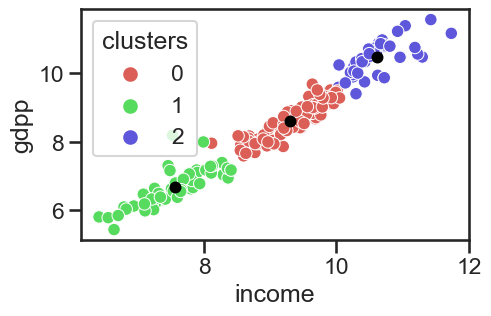

In [21]:
centroids_2 = model_2_log.cluster_centers_
plt.figure(figsize = (5,3))
sns.scatterplot(data =country_log_2, x=X1,y=X2, hue=country_log_2['clusters'],palette=sns.color_palette('hls', 3))

plt.scatter(centroids_2[:,0], centroids_2[:,1] , c= 'black', s=50)
plt.show()

In [22]:
cluster_0_2 = country_log_2[country_log_2['clusters']==0]
cluster_1_2 = country_log_2[country_log_2['clusters']==1]
cluster_2_2 = country_log_2[country_log_2['clusters']==2]
cluster_0_2['dist_2'] = (cluster_0_2[X1]-centroids_2[0,0])**2 + (cluster_0_2[X2]-centroids_2[0,1])**2
cluster_1_2['dist_2'] = (cluster_1_2[X1]-centroids_2[0,0])**2 + (cluster_1_2[X2]-centroids_2[0,1])**2
cluster_2_2['dist_2'] = (cluster_2_2[X1]-centroids_2[0,0])**2 + (cluster_2_2[X2]-centroids_2[0,1])**2
index_min_0_2 = cluster_0_2['dist_2'][cluster_0_2['dist_2'] == cluster_0_2['dist_2'].min()].index
index_min_1_2 = cluster_1_2['dist_2'][cluster_1_2['dist_2'] == cluster_1_2['dist_2'].min()].index
index_min_2_2 = cluster_2_2['dist_2'][cluster_2_2['dist_2'] == cluster_2_2['dist_2'].min()].index

In [23]:
print(f"""Os 3 países que representam os cluster com duas variáveis (income e gdpp) com função log são:
Cluster 0: {index_min_0_2[0]}
Cluster 1: {index_min_1_2[0]}
Cluster 2: {index_min_2_2[0]}""")

Os 3 países que representam os cluster com duas variáveis (income e gdpp) com função log são:
Cluster 0: Dominican Republic
Cluster 1: Vanuatu
Cluster 2: Estonia


_____________________

In [24]:
linkage = ['ward', 'complete', 'average', 'single']
distribuicao =[]
for i in range(0,4):
    model_aglo_log_2 = AgglomerativeClustering(n_clusters=3, linkage=linkage[i]).fit(country_log_2)
    count = model_aglo_log_2.labels_
    distribuicao.append(count)
   
distribuicao = pd.DataFrame(distribuicao)

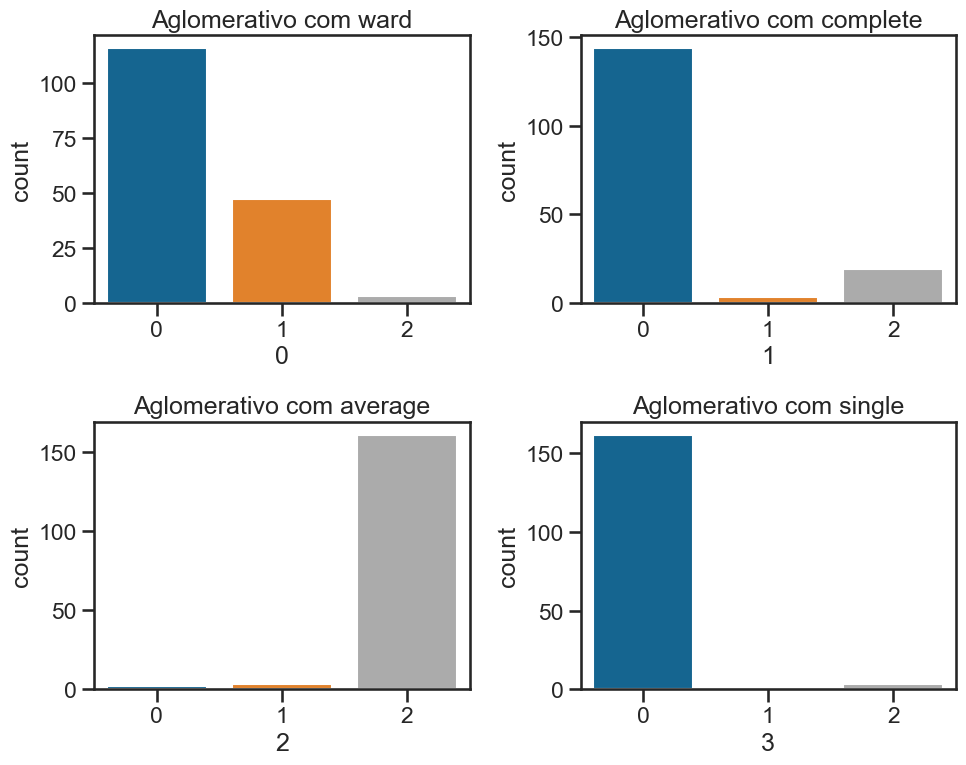

In [25]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(221)
sns.countplot(x=distribuicao.T[0])
ax.set_title('Aglomerativo com ward')

ax = fig.add_subplot(222)
sns.countplot(x=distribuicao.T[1])
ax.set_title('Aglomerativo com complete')

ax = fig.add_subplot(223)
sns.countplot(x=distribuicao.T[2])
ax.set_title('Aglomerativo com average')

ax = fig.add_subplot(224)
sns.countplot(x=distribuicao.T[3])
ax.set_title('Aglomerativo com single')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Distancias')

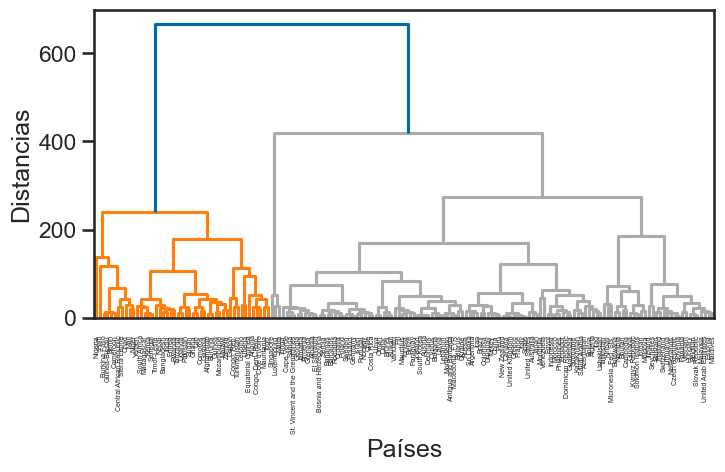

In [26]:
plt.style.use('tableau-colorblind10')
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

linkage = sch.linkage(country_log_2, method="ward")
dendrogram = sch.dendrogram(linkage, labels=country_log_2.index, leaf_rotation=90)

ax.set_xlabel('Países')
ax.set_ylabel('Distancias')

_____________________

In [35]:
model_medoid_log_2 = KMedoids(n_clusters=3, max_iter=1000, random_state=42)

model_medoid_log_2.fit(country_log_2[vars])
country_log_2['clusters_medoid'] = model_medoid_log_2.predict(country_log_2[vars])

In [36]:
cluster_0 = len(country_log_2[country_log_2['clusters_medoid'] == 0])
cluster_1 = len(country_log_2[country_log_2['clusters_medoid'] == 1])
cluster_2 = len(country_log_2[country_log_2['clusters_medoid'] == 2])

In [37]:
print(f"""Cluster 0: {cluster_0}
Cluster 1: {cluster_1}
Cluster 2: {cluster_2}""")

Cluster 0: 51
Cluster 1: 67
Cluster 2: 48


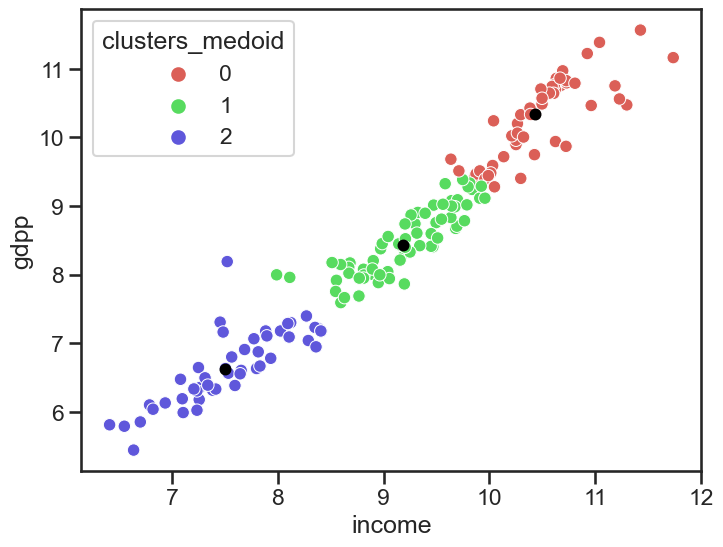

In [38]:
medoids = model_medoid_log_2.cluster_centers_
plt.figure(figsize = (8,6))
sns.scatterplot(data= country_log_2, x=X1,y=X2, hue= country_log_2['clusters_medoid'], palette= sns.color_palette('hls', 3))

plt.scatter(medoids[:,0], medoids[:,1] , c= 'black', s=50)
plt.show()

In [39]:
cluster_0 = country_log_2[country_log_2['clusters_medoid']==0]
cluster_1 = country_log_2[country_log_2['clusters_medoid']==1]
cluster_2 = country_log_2[country_log_2['clusters_medoid']==2]
cluster_0['dist_2'] = (cluster_0[X1]-medoids[0,0])**2 + (cluster_0[X2]-medoids[0,1])**2
cluster_1['dist_2'] = (cluster_1[X1]-medoids[0,0])**2 + (cluster_1[X2]-medoids[0,1])**2
cluster_2['dist_2'] = (cluster_2[X1]-medoids[0,0])**2 + (cluster_2[X2]-medoids[0,1])**2
index_min_0 = cluster_0['dist_2'][cluster_0['dist_2'] == cluster_0['dist_2'].min()].index
index_min_1 = cluster_1['dist_2'][cluster_1['dist_2'] == cluster_1['dist_2'].min()].index
index_min_2 = cluster_2['dist_2'][cluster_2['dist_2'] == cluster_2['dist_2'].min()].index

In [40]:
print(f"""Os 3 países que representam os cluster nos dados originais são:
Cluster 0: {index_min_0[0]}
Cluster 1: {index_min_1[0]}
Cluster 2: {index_min_2[0]}""")

Os 3 países que representam os cluster nos dados originais são:
Cluster 0: Cyprus
Cluster 1: Seychelles
Cluster 2: Timor-Leste
